In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm # 이제 필요없음
from konlpy.tag import Kkma
import re
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk

In [2]:
cpuData_csv = pd.read_csv('./cpuDataSet.csv',  encoding = 'CP949')

In [3]:
cpuData_csv['제목'] = cpuData_csv['발명의 명칭']
cpuData_csv['제목']

0        Iot를 기반 스마트 센서를 포함하는 환자 상태 실시간 정보 전송 시스템(real-...
1        7세주기 기반의 피부관리 카운셀링 시스템(skincare counselling sy...
2        의료 중재 레벨을 원격으로 판단하기 위한 방법 및 시스템(methods and sy...
3        사용자의 행동 분류 방법 및 장치(method and apparatus for cl...
4        신축성 저항 소자를 이용한 자세 모니터링 장치, 이를 이용한 자세 모니터링 방법 및...
                               ...                        
11822             Methods and devices for relieving stress
11823    Digital remote radio electrocardiographic moni...
11824    Managing system and managing method of organis...
11825               Life evidence sensing-reporting module
11826    Diagnostic radio frequency identification sens...
Name: 제목, Length: 11827, dtype: object

In [4]:
for i in range(len(cpuData_csv['대표청구항'])):
    cpuData_csv['대표청구항'][i] = cpuData_csv['대표청구항'][i][9:]
# cpuData_csv['대표청구항']

In [5]:
for i in range(len(cpuData_csv['발명의 명칭'])):
    cpuData_csv['발명의 명칭'][i] = re.sub(r'\([^)]*\)', '', cpuData_csv['발명의 명칭'][i])

In [6]:

cpuData_KR = cpuData_csv[cpuData_csv['국가코드'].isin(['KR']) | cpuData_csv['국가코드'].isin(['JP'])]
cpuData_ENG = cpuData_csv[cpuData_csv['국가코드'].isin(['CN']) | cpuData_csv['국가코드'].isin(['EP']) | cpuData_csv['국가코드'].isin(['US'])]
puData_KR = cpuData_csv[cpuData_csv['국가코드'].isin(['KR']) | cpuData_csv['국가코드'].isin(['JP'])]
cpuData_ENG = cpuData_csv[cpuData_csv['국가코드'].isin(['CN']) | cpuData_csv['국가코드'].isin(['EP']) | cpuData_csv['국가코드'].isin(['US'])]
cpuData_KR['발명의 명칭']

0                Iot를 기반 스마트 센서를 포함하는 환자 상태 실시간 정보 전송 시스템
1                                  7세주기 기반의 피부관리 카운셀링 시스템
2                         의료 중재 레벨을 원격으로 판단하기 위한 방법 및 시스템
3                                      사용자의 행동 분류 방법 및 장치
4       신축성 저항 소자를 이용한 자세 모니터링 장치, 이를 이용한 자세 모니터링 방법 및...
                              ...                        
6882                         진행된 환자 관리와 약물 치료 관리의 시스템과 방법
6883                                 건강 관리 장치 및 건강 관리 시스템
6884                               진단 무선 주파수 식별 센서 및 그 적용
6885                        개인 인증 장치, 정보처리 장치 및 개인 인증 시스템
6886                              에어 밸브, 전자 혈압계 및 에어 마사지기
Name: 발명의 명칭, Length: 2388, dtype: object

In [7]:
cpuData_KR['꼬꼬마'] = cpuData_KR['발명의 명칭'] + ' ' + cpuData_KR['요약'] + cpuData_KR['대표청구항']
# cpuData_csv['꼬꼬마'] = cpuData_csv['발명의 명칭'][:6887] + ' ' + cpuData_csv['요약'][:6887] + cpuData_csv['대표청구항'][:6887]
# cpuData_csv['꼬꼬마'].drop(cpuData_csv['꼬꼬마'].index[6887:]) # 영어부분 삭제


# # cpuData_csv['nltk'] = cpuData_csv['발명의 명칭'][6887:] + ' ' + cpuData_csv['요약'][6887:] + cpuData_csv['대표청구항'][6887:]
# cpuData_csv['nltk'].drop(cpuData_csv['nltk'].index[:6887]) # 한글부분 삭제
cpuData_ENG['nltk'] = cpuData_ENG['발명의 명칭'] + ' ' + cpuData_ENG['요약'] + cpuData_ENG['대표청구항']

In [8]:
kkmaCPU = Kkma() # 꼬꼬마 객체
def morph(input_data):  # pos(모든 형태소 분석)
    preprcessed = kkmaCPU.pos(input_data)
    # print(preprcessed)
    return preprcessed

In [9]:
def get_wordData_KR(morpheme_pos):
    # words = [s for s, t in morpheme]
    # tags = [t for s, t in morpheme]
    wordData = []
    for words, tags in morpheme_pos:
        #if (tags == 'NNG') or (tags == 'NNP') or (tags == 'OL'):
        if (("NN") or ("OL")) in tags:
            wordData.append(words) # NNG, NNP, OL만 뽑음
    
    return wordData

In [10]:
def get_wordData_ENG(morpheme_pos):
    # words = [s for s, t in morpheme]
    # tags = [t for s, t in morpheme]
    wordData = []
    for words, tags in morpheme_pos:
        #if (tags == 'NNG') or (tags == 'NNP') or (tags == 'OL'):
        if (("NN")) in tags:
            wordData.append(words) # NNG, NNP, OL만 뽑음
    
    return wordData

In [11]:
# 한글 형태소 분석
morpheme_kkma = morph(str(cpuData_KR['꼬꼬마'].values)[2:-3])
wordMaterialList_KR = get_wordData_KR(morpheme_kkma)

In [12]:
# 영어 형태소 분석
nltk.download('punkt')
morpheme_nltk_tokens = nltk.word_tokenize(str(cpuData_ENG['nltk'].values)[2:-3])
morpheme_nltk = nltk.pos_tag(morpheme_nltk_tokens)

# nltk.download('tagsets')
wordMaterialList_ENG = get_wordData_ENG(morpheme_nltk)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Assistant_2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# morpheme_nltk


In [14]:
def changeText(wordList):
    wordStr = '시작'
    for word in wordList:
        wordStr = wordStr + ' ' + word
    wordStr = wordStr[3:]
    return wordStr

wordMaterialStr_KR = changeText(wordMaterialList_KR)
wordMaterialStr_ENG = changeText(wordMaterialList_ENG)

In [15]:
stopwords = set(STOPWORDS)

# 한국어 워드클라우드
wordcloudObject_KR = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',
    background_color='white',
    stopwords=stopwords).generate(wordMaterialStr_KR)
                # 맑음 폰트, 배경 하얀색, 불용어 => stopwords

# 영어 워드클라우드
wordcloudObject_ENG = WordCloud(
    background_color='white',
    stopwords=stopwords).generate(wordMaterialStr_ENG)

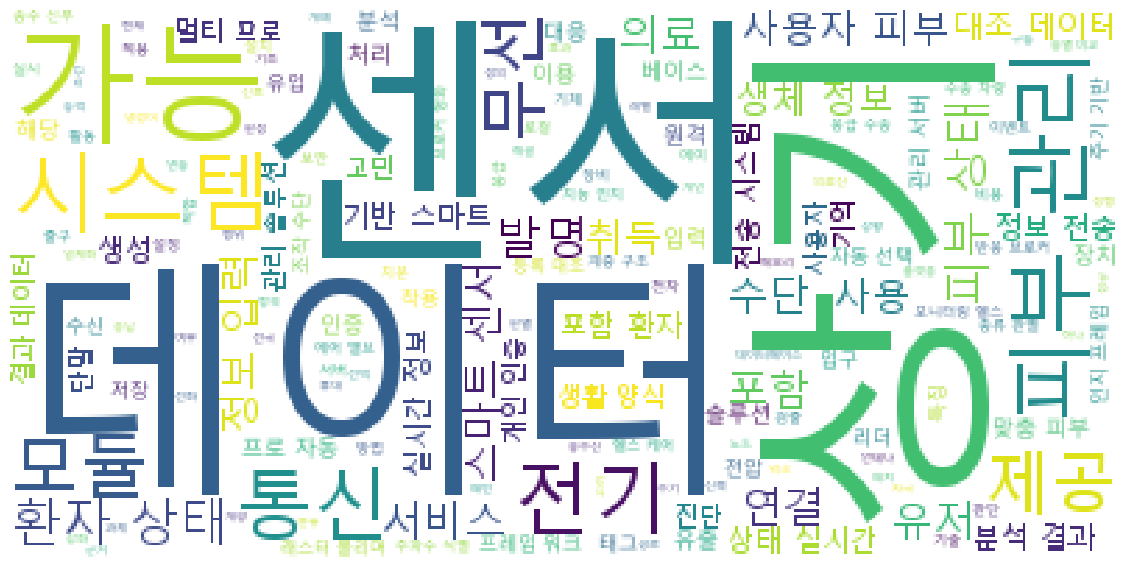

In [23]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloudObject_KR, interpolation='None')
plt.axis('off')
plt.show()
# plt.savefig() # 저장


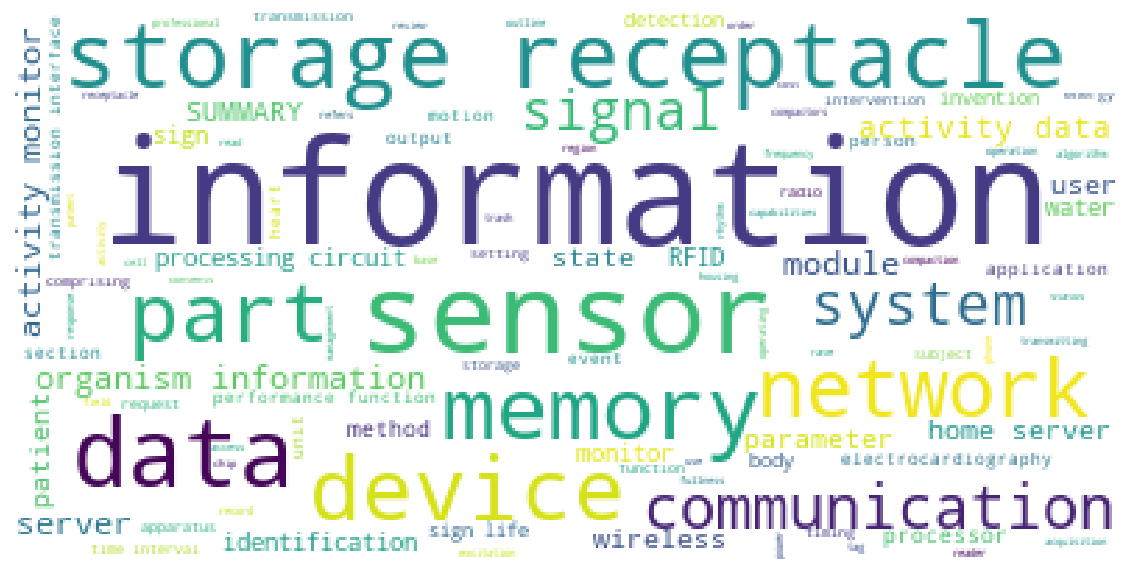

In [24]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloudObject_ENG, interpolation='None')
plt.axis('off')
plt.show()